In [14]:
weather = pd.read_csv("../weather3_180703.csv")
weather['date'] = pd.to_datetime(weather["date"])
station = weather[weather['station_nbr'] == 2]

In [17]:
station.head()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,day,relative_humility,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing
1035,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,1,87.218091,33.736026,9.166667,6,1,2,1,0,0
1036,2,2012-01-02,46.0,28.0,37.0,12.0,24.0,32.0,28.0,0.0,...,2,59.009292,28.579201,9.183333,0,0,0,0,0,1
1037,2,2012-01-03,28.0,9.0,18.5,-6.0,4.0,16.0,46.0,0.0,...,3,52.518736,5.373595,9.200000,1,0,0,0,0,1
1038,2,2012-01-04,21.0,5.0,13.0,-11.0,0.0,11.0,52.0,0.0,...,4,55.391792,-0.932125,9.216667,2,0,0,0,0,1
1039,2,2012-01-05,31.0,20.0,25.5,2.0,12.0,21.0,39.0,0.0,...,5,56.071391,14.961608,9.233333,3,0,0,0,0,1


In [18]:
train = pd.read_csv("../data/train.csv")
train.date = pd.to_datetime(train.date)
train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [19]:
key = pd.read_csv("../data/key.csv")
station = station.merge(key)

In [20]:
station = station.merge(train)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
95122,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,...,10.4,4,0,0,0,0,1,16,107,0
95123,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,...,10.4,4,0,0,0,0,1,16,108,0
95124,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,...,10.4,4,0,0,0,0,1,16,109,0
95125,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,...,10.4,4,0,0,0,0,1,16,110,0
95126,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,...,10.4,4,0,0,0,0,1,16,111,0


In [21]:
station['log1p_units'] = np.log1p(station.units)

In [7]:
dfX = station[['tmax','tmin','tavg','dewpoint','wetbulb','heat','cool']]
dfy1 = station['units']
dfy2 = station['log1p_units']

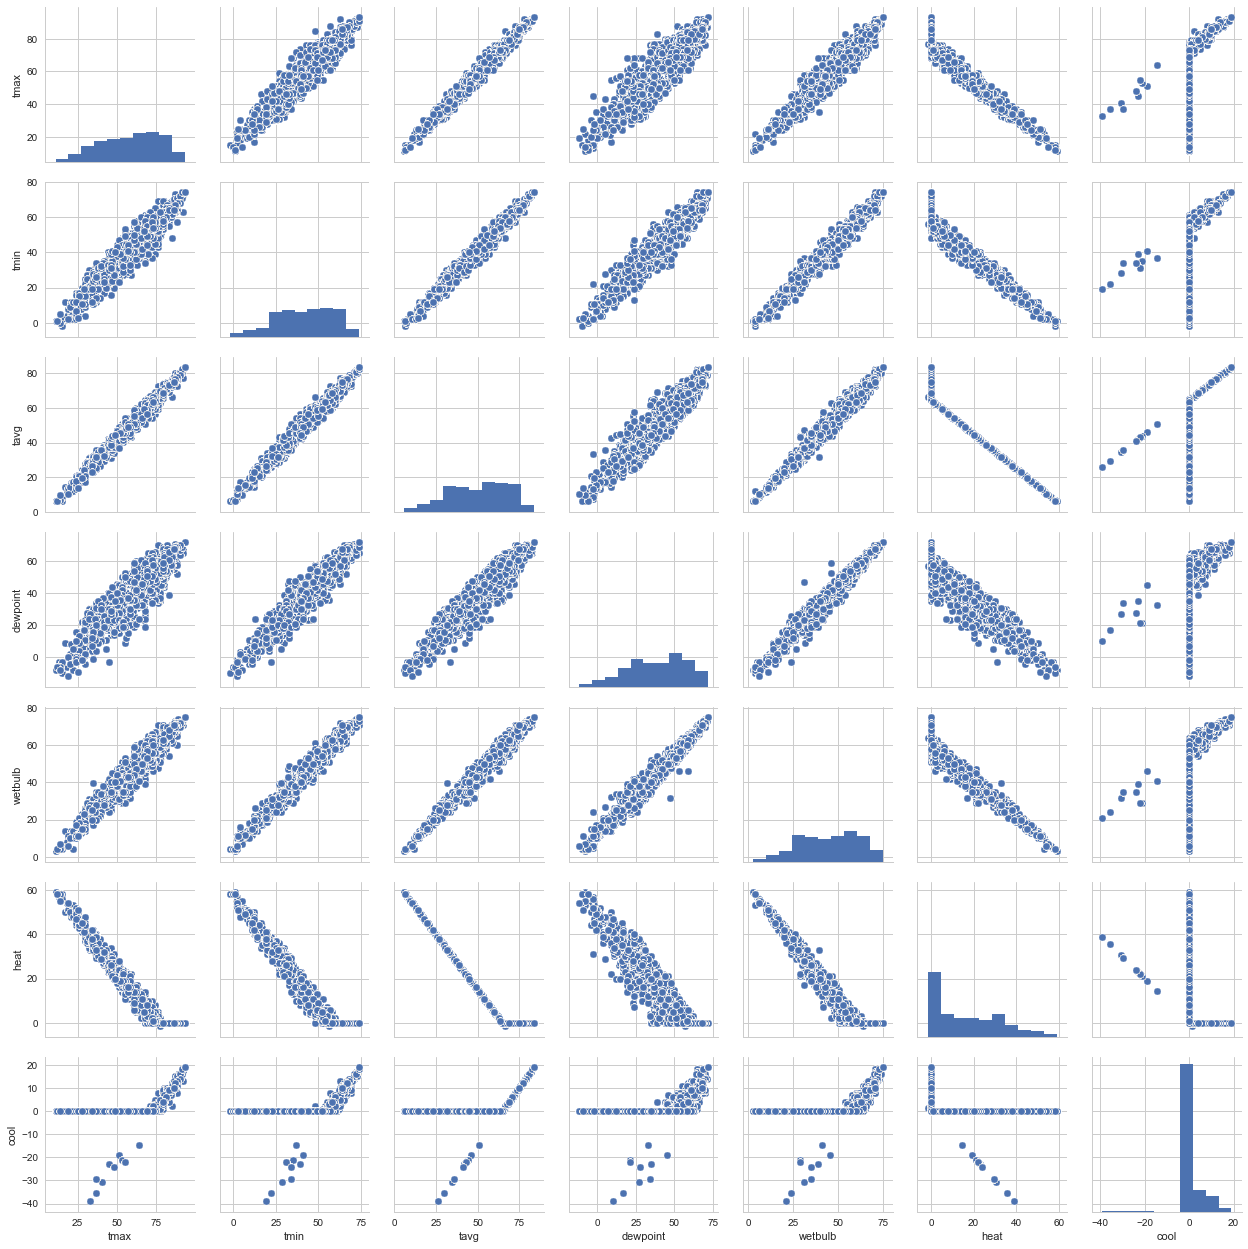

In [8]:
sns.pairplot(dfX)
plt.show()

In [22]:
dfX.corr()

,tmax,tmin,tavg,dewpoint,wetbulb,heat,cool
tmax,1.000000,0.949522,0.988452,0.903222,0.961872,-0.973863,0.519179
tmin,0.949522,1.000000,0.986094,0.954761,0.983488,-0.968154,0.522706
tavg,0.988452,0.986094,1.000000,0.939712,0.984660,-0.983605,0.527547
dewpoint,0.903222,0.954761,0.939712,1.000000,0.978985,-0.926859,0.486772
wetbulb,0.961872,0.983488,0.984660,0.978985,1.000000,-0.969596,0.521602
heat,-0.973863,-0.968154,-0.983605,-0.926859,-0.969596,1.000000,-0.414208
cool,0.519179,0.522706,0.527547,0.486772,0.521602,-0.414208,1.000000


## 전체 데이터로 다시 OLS

In [23]:
target1 = station['units']
target2 = station['log1p_units']

station.drop(columns=['units','log1p_units'],inplace=True)
station.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,windchill,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr
95122,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,...,40.561053,10.4,4,0,0,0,0,1,16,107
95123,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,...,40.561053,10.4,4,0,0,0,0,1,16,108
95124,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,...,40.561053,10.4,4,0,0,0,0,1,16,109
95125,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,...,40.561053,10.4,4,0,0,0,0,1,16,110
95126,2,2014-10-31,49.0,40.0,44.5,0.0,35.0,40.0,20.0,0.0,...,40.561053,10.4,4,0,0,0,0,1,16,111


In [24]:
df1 = pd.concat([station,target1], axis=1)
df2 = pd.concat([station,target2], axis=1)

##### 1. OLS : df1 (units) 

In [25]:
model1 = sm.OLS.from_formula('units ~ tmax + tmin + tavg + dewpoint + wetbulb + heat + cool + preciptotal + stnpressure + sealevel \
                            + resultspeed + C(resultdir) + avgspeed + C(year) + C(month) + relative_humility + windchill + weekend \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df1)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     5868.
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:10:57   Log-Likelihood:            -2.7907e+05
No. Observations:               94572   AIC:                         5.585e+05
Df Residuals:                   94398   BIC:                         5.601e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.6758 

##### 2. OLS : df1 (units) - 스케일링 
- conditional number가 너무 높음.

In [26]:
model1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df1)
result1_1 = model1_1.fit()
print(result1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     5868.
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:11:19   Log-Likelihood:            -2.7907e+05
No. Observations:               94572   AIC:                         5.585e+05
Df Residuals:                   94398   BIC:                         5.601e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

스케일링을 했으나 conditional number가 크게 떨어지진 않았다.

##### 3. OLS :  df1 (units) - 아웃라이어 제거 

In [27]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result1.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df1) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

1160

In [28]:
idx = list(set(range(len(df1))).difference(idx_outlier))
df1_1 = df1.iloc[idx, :].reset_index(drop=True)
df1_1

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,units
0,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,1,0
1,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,2,0
2,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,3,0
3,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,4,0
4,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,5,0
5,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,6,0
6,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,7,0
7,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,8,0
8,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,9,0
9,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,10,0


In [29]:
# OLS - df1_1
model1_1_1 = sm.OLS.from_formula('units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     8987.
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:11:54   Log-Likelihood:            -1.7973e+05
No. Observations:               93419   AIC:                         3.598e+05
Df Residuals:                   93245   BIC:                         3.614e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

conditional number에 전혀 변화가 없다...

##### 4. 변수변환 : df2 (log1p_units) 

In [30]:
model2 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df2)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 1.021e+04
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:13:09   Log-Likelihood:                 57333.
No. Observations:               94572   AIC:                        -1.143e+05
Df Residuals:                   94398   BIC:                        -1.127e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

units에 log를 취하여 R square값은 올랐지만, 여전히 conditional number는 그대로. 상관관계가 높은 변수 제거해야할 거 같다.

##### 5. 변수변환 : df2 (log1p_units) + 아웃라이어 제거

In [31]:
# 아웃라이어 제거
# Cook's distance > 2 인 값 제거
influence = result2.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(df2) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
len(idx_outlier)

2792

In [32]:
idx = list(set(range(len(df2))).difference(idx_outlier))
df2_1 = df2.iloc[idx, :].reset_index(drop=True)
df2_1

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,daytime,week7,weekend,code_change,rainY,otherY,nothing,store_nbr,item_nbr,log1p_units
0,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,1,0.000000
1,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,2,0.000000
2,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,3,0.000000
3,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,4,0.000000
4,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,5,0.000000
5,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,6,0.000000
6,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,7,0.000000
7,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,8,0.000000
8,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,9,0.000000
9,2,2012-01-01,48.0,33.0,40.5,16.0,37.0,39.0,24.0,0.0,...,9.166667,6,1,2,1,0,0,16,10,0.000000


In [33]:
# OLS - df2_1
model2_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df2_1)
result2_1 = model2_1.fit()
print(result2_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.984e+04
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:13:39   Log-Likelihood:             1.4191e+05
No. Observations:               91795   AIC:                        -2.835e+05
Df Residuals:                   91621   BIC:                        -2.818e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

설명력이...너무 높다.(0.987), conditional number는 그대로 --> Overfitting이 의심됨.

##### 6. 변수변환 : df2 (log1p_units) + 아웃라이어 제거 + preciptotal 변수변환 

In [35]:
# OLS - df2_1_1
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tmax) + scale(tmin) + scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.984e+04
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:16:50   Log-Likelihood:             1.4191e+05
No. Observations:               91795   AIC:                        -2.835e+05
Df Residuals:                   91621   BIC:                        -2.818e+05
Df Model:                         173                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [36]:
# OLS - df2_1_1 - tmax, tmin 빼고
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(tavg) + scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.007e+04
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:18:06   Log-Likelihood:             1.4191e+05
No. Observations:               91795   AIC:                        -2.835e+05
Df Residuals:                   91622   BIC:                        -2.818e+05
Df Model:                         172                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [37]:
# OLS - df2_1_1 - tmax, tmin , tavg빼고
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(wetbulb) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.031e+04
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:19:18   Log-Likelihood:             1.4191e+05
No. Observations:               91795   AIC:                        -2.835e+05
Df Residuals:                   91623   BIC:                        -2.819e+05
Df Model:                         171                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [38]:
# OLS - df2_1_1 - tmax, tmin , tavg, wetbulb, resultspeed빼고
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(heat) + scale(cool)\
                            + scale(np.log1p(preciptotal)) + scale(stnpressure) + scale(sealevel) \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.078e+04
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:20:36   Log-Likelihood:             1.4191e+05
No. Observations:               91795   AIC:                        -2.835e+05
Df Residuals:                   91625   BIC:                        -2.819e+05
Df Model:                         169                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [54]:
# OLS - df2_1_1 - tmax, tmin , tavg, wetbulb, resultspeed, year, month, heat, log(preciptotal)빼고
model2_1_1 = sm.OLS.from_formula('log1p_units ~ scale(dewpoint) + scale(cool)\
                            + scale(stnpressure) + scale(sealevel) \
                            + C(np.cos(resultdir*10/180 * np.pi)) + scale(avgspeed) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(store_nbr) + C(item_nbr)', data = df2_1)

result = model2_1_1.fit()
result2_1_1 = model2_1_1.fit()
print(result2_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:            log1p_units   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.563e+04
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:32:48   Log-Likelihood:             1.4189e+05
No. Observations:               91795   AIC:                        -2.835e+05
Df Residuals:                   91643   BIC:                        -2.820e+05
Df Model:                         151                                         
Covariance Type:            nonrobust                                         
                                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [60]:
# OLS - df1_1 - tmax, tmin, tavg, heat 제거
model1_1_1 = sm.OLS.from_formula('units ~  scale(dewpoint) + scale(wetbulb) + scale(cool)\
                            + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(resultspeed)  \
                            + C(resultdir) + scale(avgspeed) + C(year) + C(month) + scale(relative_humility) + scale(windchill) + C(weekend) \
                            + C(rainY) + C(item_nbr)', data = df1_1)
result1_1_1 = model1_1_1.fit()
print(result1_1_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     9146.
Date:                Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:51:26   Log-Likelihood:            -1.7973e+05
No. Observations:               93419   AIC:                         3.598e+05
Df Residuals:                   93248   BIC:                         3.614e+05
Df Model:                         170                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

변화없음.(5번 결과와 동일)

#### 7. result2의 잔차의 정규성 검정 : 정규성을 띄지 않음.

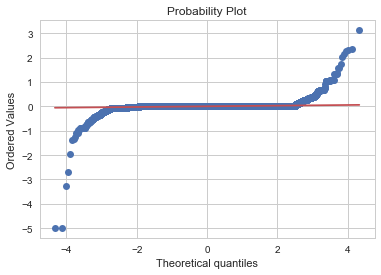

In [55]:
sp.stats.probplot(result2_1_1.resid, plot=plt)
plt.show()